In [1]:
# --- Decision Tree Classifier on Iris Dataset ---
# Author: Kheireddin Kadri
# Objective: Train, visualize and optimize a Decision Tree classifier

# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# 2. Load Dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # only two features for visualization
y = iris.target


In [3]:

# 3. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

Accuracy: 0.6333333333333333


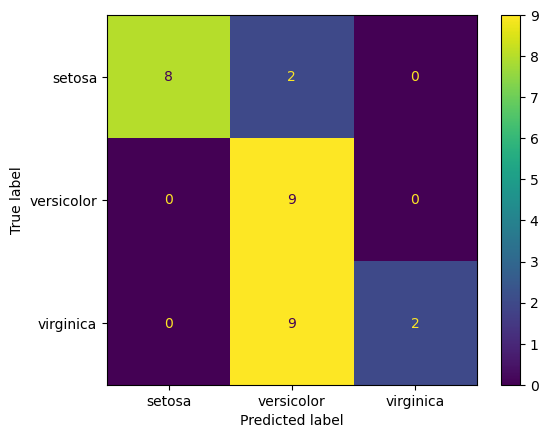

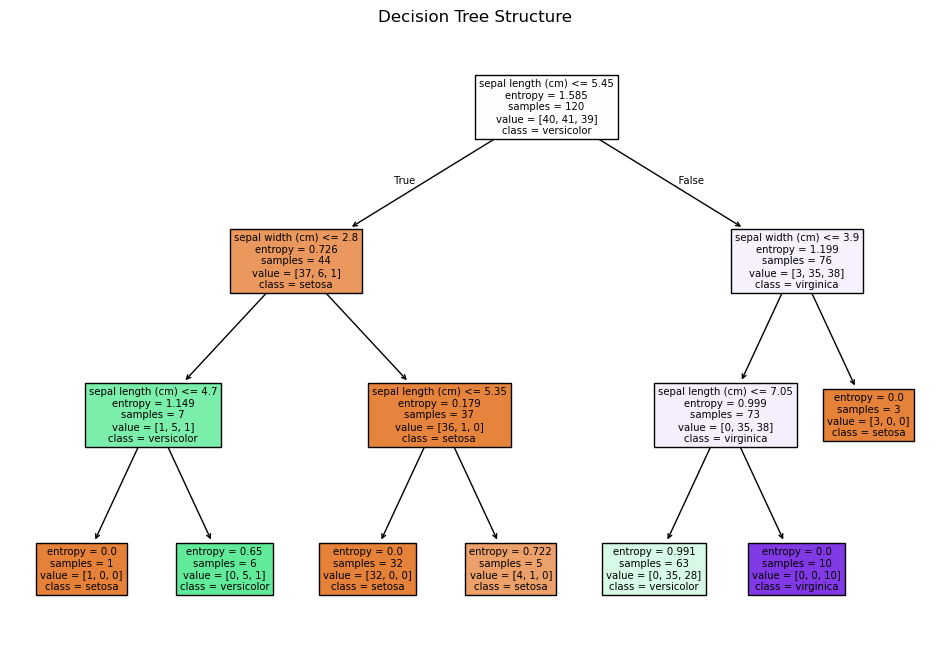

In [4]:

# 5. Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=iris.target_names).plot()
plt.show()

# 6. Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.title("Decision Tree Structure")
plt.show()


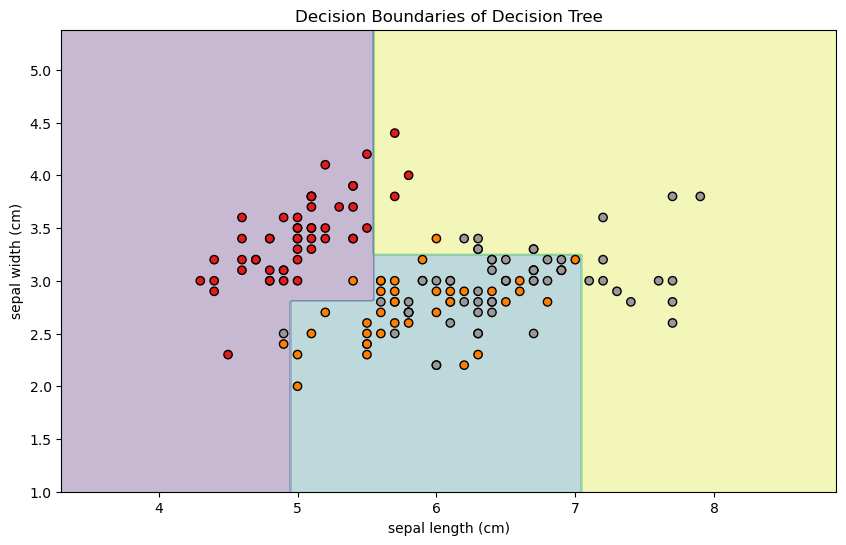

In [6]:

# 7. Decision Boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Decision Boundaries of Decision Tree")
plt.savefig('Decision Boundaries of Decision Tree.png', dpi=300)
plt.show()


In [7]:
# 8. GridSearchCV optimization
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, None]  #nomber of nodes
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)


Best parameters: {'criterion': 'gini', 'max_depth': 3}
Best cross-validated accuracy: 0.761904761904762
